# anomality detection in DTS 
### reading files predicted in the first step and prepare functions

In [1]:
import pandas as pd 
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def horizontal_gradien(c,df,start_index=2):
    l=list(df.columns)
    indx=l.index(c)
    if indx>=start_index:
        out= (df[l[indx]]-df[l[indx-1]])/df[l[indx-1]]
    else :
        if indx==1:
            out= df[l[indx]]/df[l[indx]]
        else:
            out= df[l[indx]]
            
    if len(out[out==np.inf])>0:
        out.loc[out==np.inf]=out[out.loc[out==np.inf].index-3]
        print(out.loc[out==np.inf])
    return out.fillna(0.1)

In [3]:
def vertical_gradien(c,df,start_index=1):
    dept=c[0].copy()
    if c.name>=start_index:
        out=(df.loc[c.name][:]-df.loc[c.name-1][:])/df.loc[c.name-1][:]
        out[0]=dept
    else :
        out=df.loc[c.name][:]/df.loc[c.name][:]
        out[0]=dept
    if len(out[out==np.inf])>0:
        out.loc[out==np.inf]=(df.loc[c.name-1][out[out==np.inf].index]-df.loc[c.name-2][out[out==np.inf].index])/df.loc[c.name-2][out[out==np.inf].index]
    return out.fillna(0.1)

In [4]:
def clean_dataset(df):
    df=pd.DataFrame(df)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64).values

In [5]:
def anomality_3d(c,df,start_index=2):
    for i in c.index:
        if i !='Depth (m)':
            c.loc[i].append(c.loc['Depth (m)'])
    return c

## making data normalisation and preprocessing

In [6]:
base_path='/home/osman/aramko/tsy/'
forwrd=read_csv(base_path+"forwrd_predict.csv")
backwrd=read_csv(base_path+"backward_predict.csv")

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
horizon=forwrd.apply(lambda x :horizontal_gradien(x.name,forwrd),axis=0)
vertical=forwrd.apply(lambda x :vertical_gradien(x,forwrd),axis=1)
idx=~horizon.isin([np.nan, np.inf, -np.inf]).any(1)
vertical=vertical[~horizon.isin([np.nan, np.inf, -np.inf]).any(1)]
horizon=horizon[~horizon.isin([np.nan, np.inf, -np.inf]).any(1)]
vertical=pd.DataFrame(scaler.fit_transform(vertical),columns=forwrd.columns)
horizon=pd.DataFrame((scaler.fit_transform(horizon)),columns=forwrd.columns)

Series([], dtype: float64)


## making 2d gradien matrice 

In [8]:
concatinated=pd.concat([horizon,vertical])\
            .applymap(lambda x: [] if x != x else x)\
            .groupby('Depth (m)', as_index=False).agg({i:list for i in vertical.columns[1:]})
concatinated

,Depth (m),03/18/2016 19:01:15,18/03/2016 08:59:20,18/03/2016 09:00:22,18/03/2016 09:01:24,18/03/2016 09:02:26,18/03/2016 09:03:27,18/03/2016 09:04:30,18/03/2016 09:05:31,18/03/2016 09:06:33,...,18/03/2016 18:50:57,18/03/2016 18:51:59,18/03/2016 18:53:00,18/03/2016 18:54:02,18/03/2016 18:55:04,18/03/2016 18:56:06,18/03/2016 18:57:08,18/03/2016 18:58:10,18/03/2016 18:59:11,18/03/2016 19:00:13
0,-1.733782,"[0.0, 51.22536805310592]","[-8.469696738451947, 31.36817905765458]","[-4.642278878423962, 31.179459341276687]","[-14.405311000647256, 25.7180997854552]","[12.059229239599151, 27.747467853593026]","[-5.457682559024862, 27.912069048239683]","[5.646388222969206, 32.57477852928633]","[5.6146327283928885, 32.11709083647948]","[-6.6678167932603865, 29.447966650986757]",...,"[1.7222984993955381, 50.82399906999232]","[0.39265601123565247, 50.776720023698964]","[-0.8598479490064593, 50.970736606599544]","[5.774664915989886, 51.347360186891876]","[0.19039282047760728, 51.26936319150564]","[2.2173622019052543, 51.09338477902806]","[0.575555775653902, 50.95335430747883]","[-7.037122309308584, 50.86310091989062]","[4.184113759416474, 50.96069383658413]","[2.171591825265601, 51.054090510423464]"
1,-1.732606,"[0.0, 0.21599202181177218]","[-8.445284533483996, 1.5787888086841537]","[-7.863874624262767, -1.4816167803867804]","[-14.580707615583863, -1.3533323472717143]","[2.7841401096207123, -6.108955729054664]","[8.722706854534865, 6.085431623552821]","[2.628607853974589, 3.8138627304282475]","[5.283557964660859, 3.6118108152336]","[-15.778662657169733, -5.446895881376424]",...,"[-0.10372506252633597, -0.035370561721415776]","[0.023832347779331662, -0.13228411907193055]","[0.3434487440992027, 0.17190510239882267]","[1.6689261557317376, -0.5222080552306612]","[0.6203230717469005, -0.4463957813748931]","[3.2282611980514027, -0.2675028574102199]","[1.9042271912871118, -0.053451108938294516]","[-6.876462080796194, -0.029013439447045503]","[3.5108784605345678, -0.16964526305309666]","[5.969123554114711, 0.6839772015992013]"
2,-1.731420,"[0.0, 0.163452663301094]","[-8.359996972918507, 5.018256691276767]","[-12.845277398255377, -0.7508269501171178]","[-16.910481976992955, -2.3066888965722545]","[2.2455545286773866, -2.7968011384502187]","[7.139860969820308, -3.8224766243558554]","[8.522618649556561, 0.5182359548651153]","[20.08038046036511, 6.575885751261829]","[-19.540917218484548, 0.6928087439410757]",...,"[-1.2429393318221267, -0.6693218745432189]","[0.42115968112324037, -0.5660941740303469]","[-0.10546566870475041, -0.6797949869186289]","[2.988415029691247, -0.4608134528487702]","[4.393862383927772, 0.19615027713844477]","[-0.708595601706306, -0.5020467246015391]","[4.425250254552944, -0.09915631389518127]","[-8.837961078452247, -0.40158585079129566]","[3.932617787265445, -0.3139631964888032]","[4.698056431166852, -0.5942261348245095]"
3,-1.729058,"[0.0, -2.272609353947988]","[-8.453882860098846, -4.9480918813377865]","[-15.231331209992561, -8.097475471256717]","[12.582441666971365, 14.801602848181245]","[-7.0732136931352905, -3.420339131271882]","[9.549713936334111, -1.88828284058871]","[12.31831337481135, 3.06798548172563]","[-2.7473715336275792, -3.104157497966062]","[-12.04613642891325, 2.357788754821097]",...,"[-2.1747878910410154, -2.553357675522204]","[-0.9902267709631016, -2.9235902747724767]","[4.478413286680199, -1.7254743681148164]","[5.828571213948391, -1.1092922080283012]","[7.036224840228118, -1.57879757318456]","[-4.057116155907083, -1.864547158456962]","[3.182059916107605, -1.297169847060511]","[-8.753729050436933, -1.5190529739246672]","[2.75716642013327, -2.104710616688138]","[8.393066566214793, -1.5245665327314104]"
4,-1.727881,"[0.0, -0.9011597953454753]","[-8.543379056365653, -5.773011217401356]","[-12.885621198677972, -3.255239871494538]","[9.584130299641533, -3.8110394174122395]","[-11.649643508831652, -7.350720289164508]","[22.343777181248832, -0.8539146361973113]","[5.723632209941346, -5.837312944802416]","[4.3695675618522

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
concatinated['Depth (m)']=scaler.fit_transform(concatinated['Depth (m)'].values.reshape(-1, 1))
concatinated=concatinated.apply(lambda x :anomality_3d(x,concatinated),axis=1)
concatinated=concatinated[1:][concatinated.columns[2:]]
points=np.concatenate([np.array([np.array(i) for i in concatinated[j].values]) for j in concatinated.columns])
points=clean_dataset(points)

## making segmentation and draw 2d results

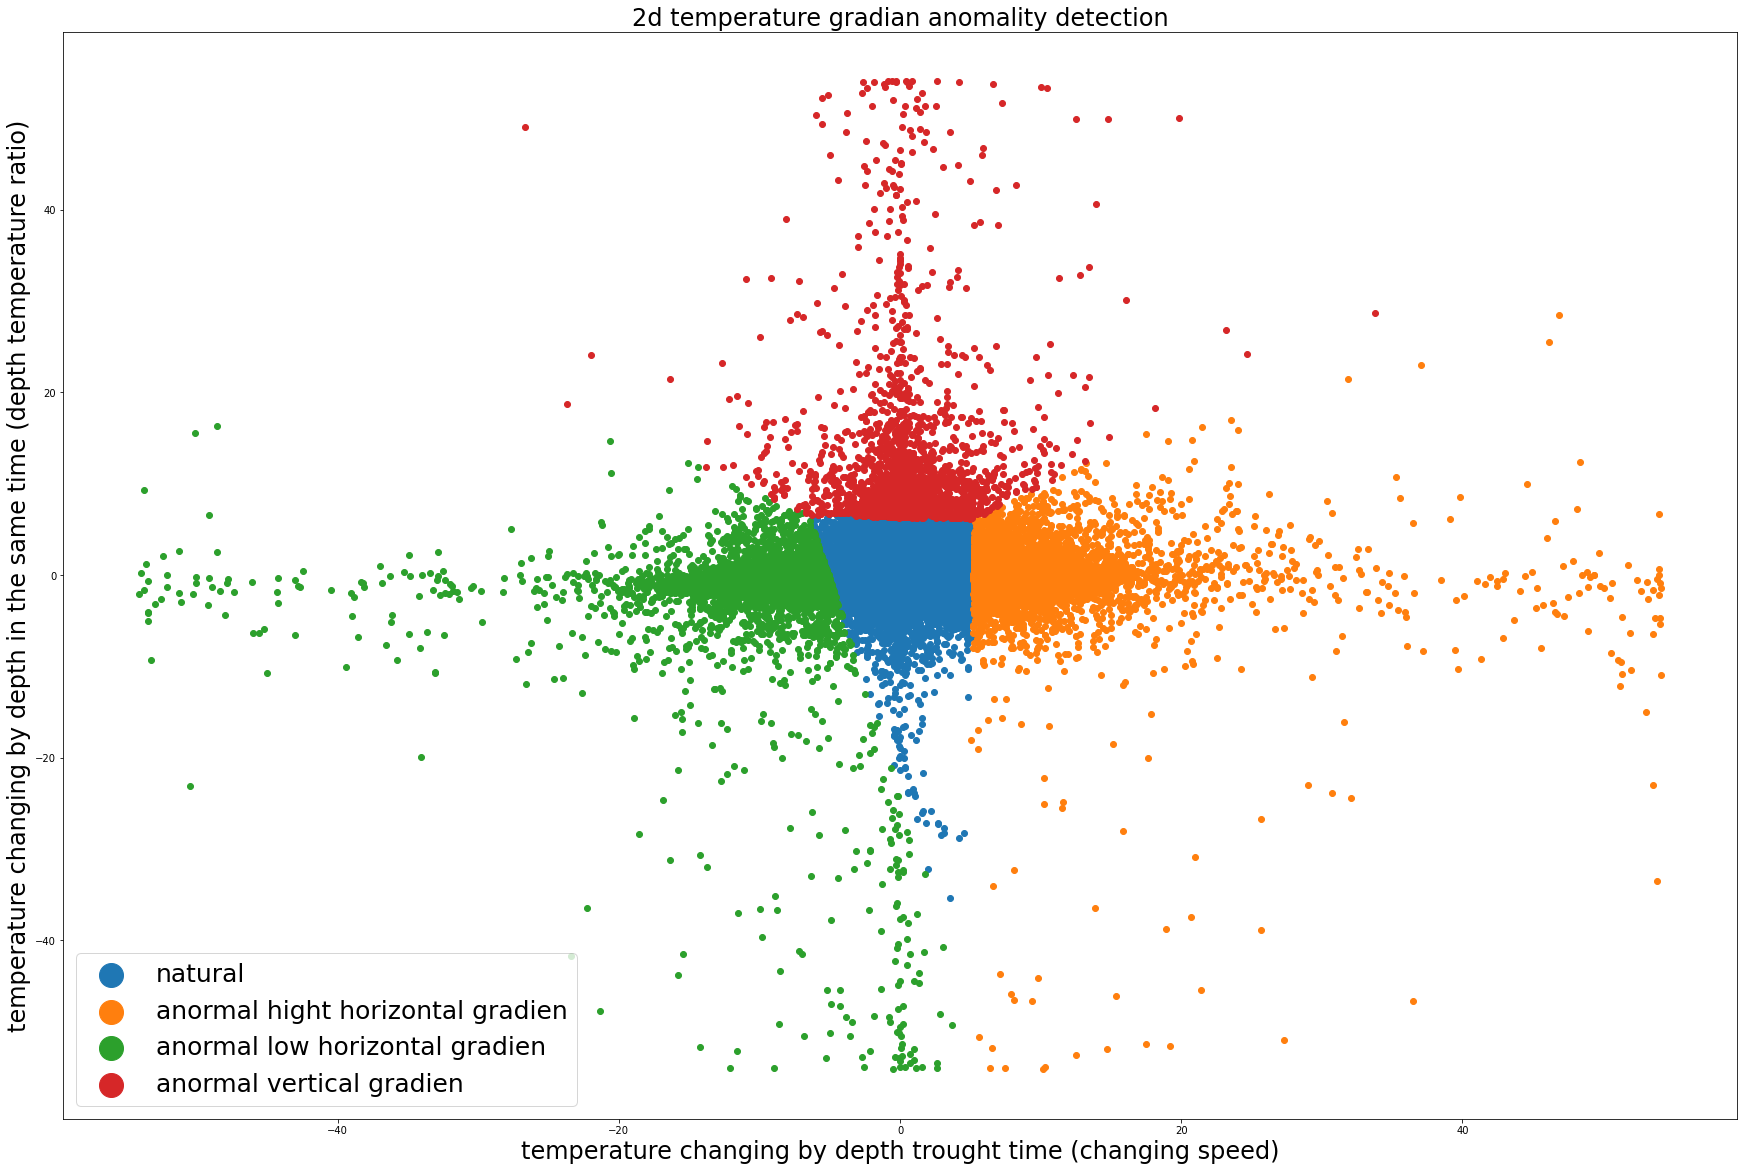

In [18]:
from sklearn.cluster import KMeans
import numpy as np
model = KMeans(n_clusters=4,random_state=1230).fit(points[:,0:2])
classe={0:'natural',
        1:'anormal hight horizontal gradien',
        2: 'anormal low horizontal gradien',
        3:'anormal vertical gradien'}
fig, ax = plt.subplots(figsize=(30,20))
for g in np.unique(model.labels_):
    i = np.where(model.labels_ == g)
    ax.scatter(points[i][:,0],points[i][:,1], label=classe[g])
ax.legend(loc='lower left',prop={'size': 25},markerscale=4)
plt.xlabel('temperature changing by depth trought time (changing speed)',fontsize=24)
plt.ylabel('temperature changing by depth in the same time (depth temperature ratio)',fontsize=24)
plt.title('2d temperature gradian anomality detection',fontsize=24)
plt.show()

## drawing in 3d for better understand

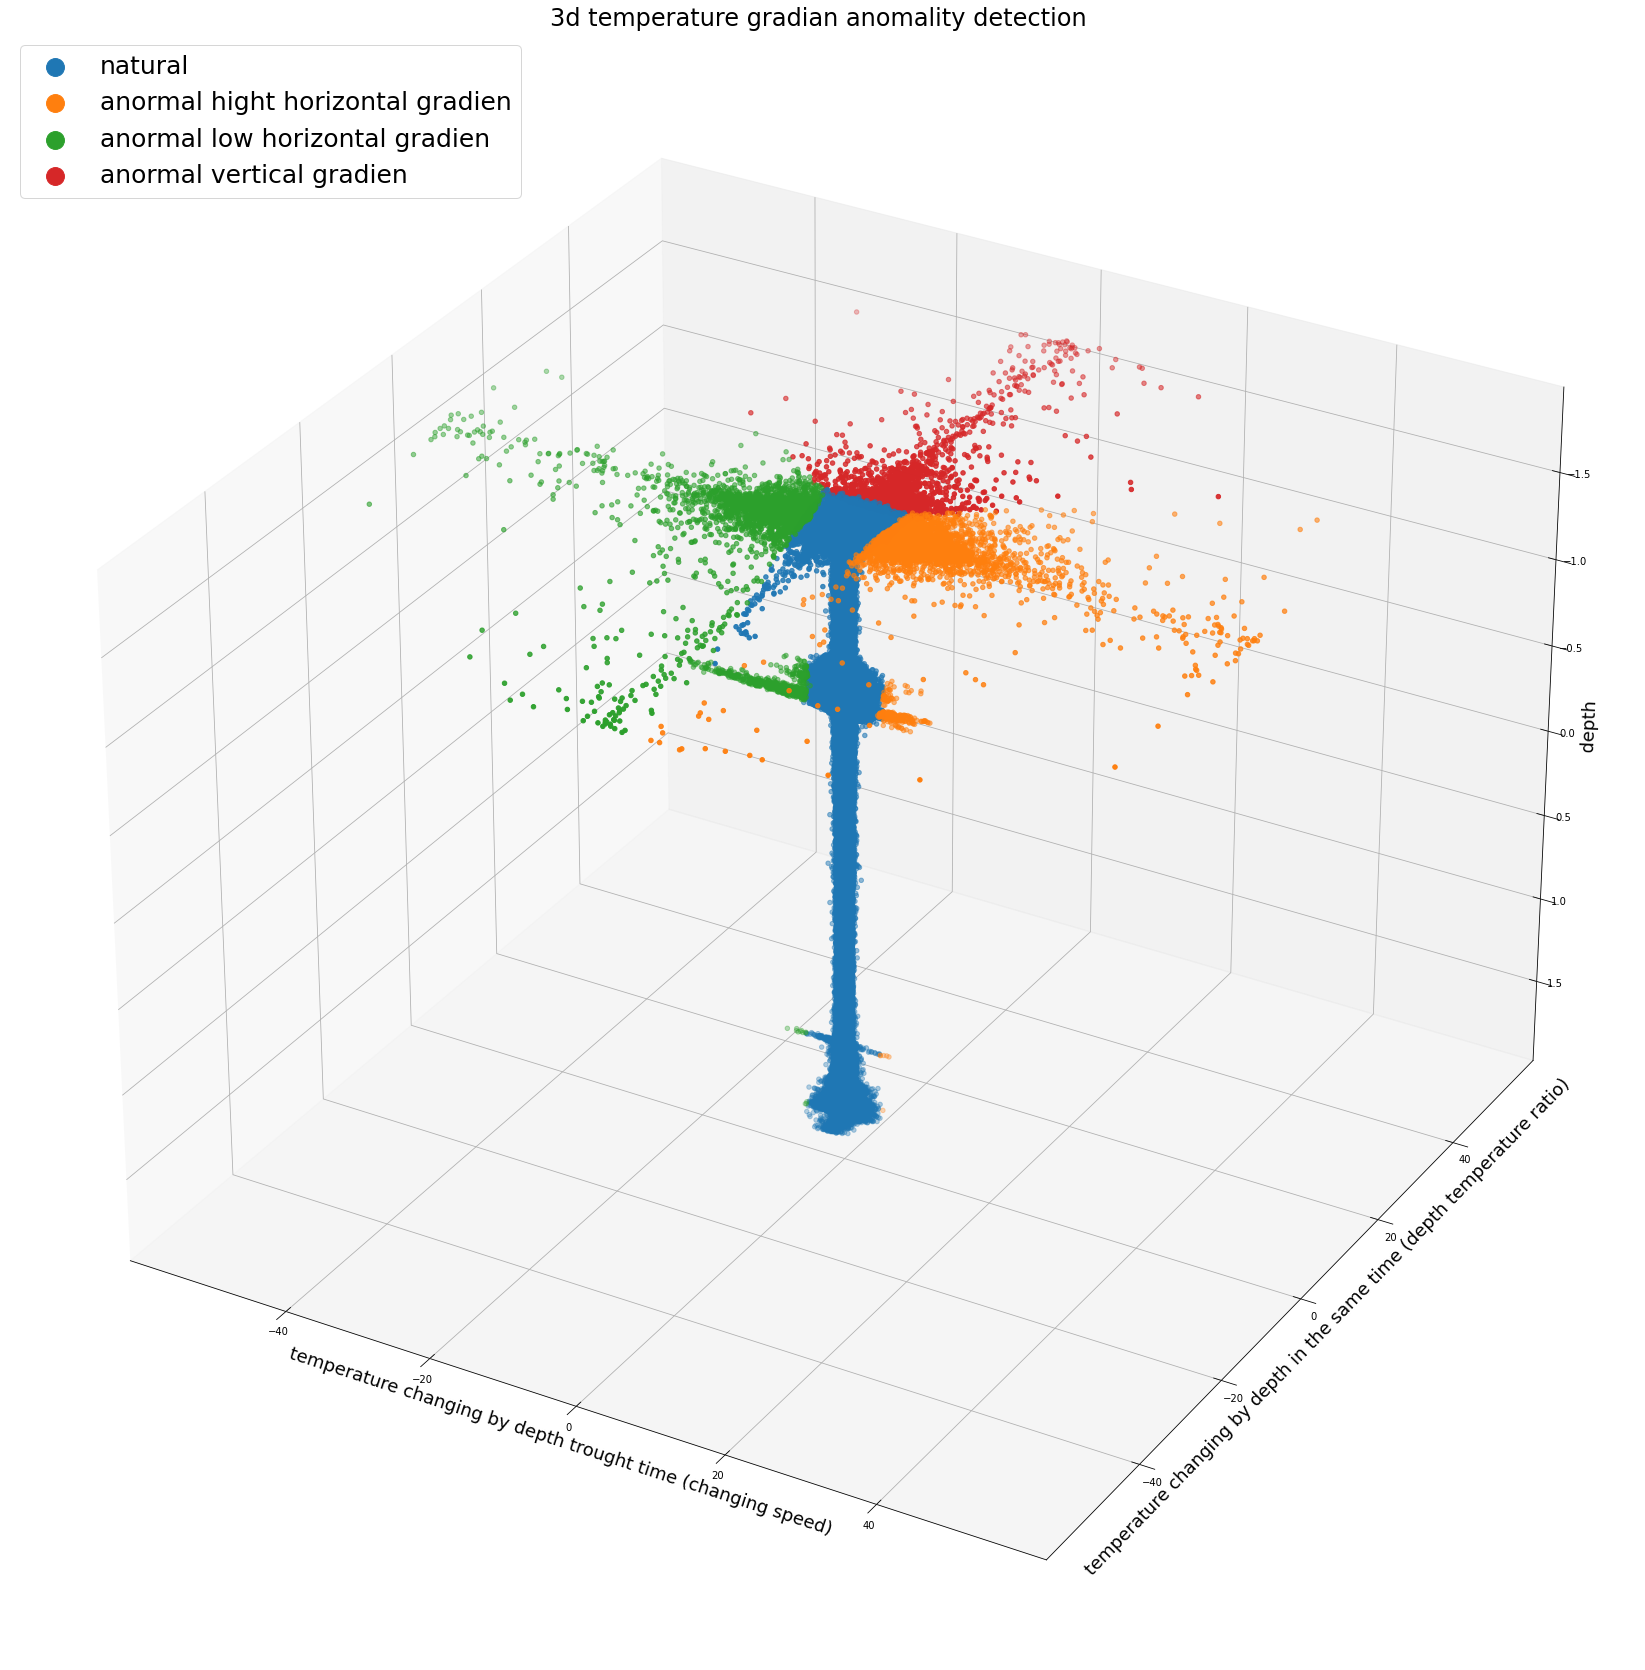

In [19]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d.axes3d import get_test_data
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(projection='3d')
for g in np.unique(model.labels_):
    i = np.where(model.labels_ == g)
    ax.scatter(points[i][:,0],points[i][:,1],points[i][:,2], label=classe[g])
ax.legend(loc='upper left',prop={'size': 25},markerscale=4)
ax.set_xlabel('temperature changing by depth trought time (changing speed)',fontsize=18)
ax.set_ylabel('temperature changing by depth in the same time (depth temperature ratio)',fontsize=18)
ax.set_zlabel('depth',fontsize=18)
ax.invert_zaxis()
plt.title('3d temperature gradian anomality detection ',fontsize=24)
plt.show()

In [14]:
results=forwrd[['Depth (m)']][idx]
for i in vertical.columns :
    if i != 'Depth (m)':  
        rkmeans=[]
        for j in range(vertical.shape[0]):
            rkmeans.append([horizon[i][j],vertical[i][j]])
        results[i]=model.predict(np.array(rkmeans))

## segmentation of the input data by class

In [15]:
results.to_csv('results_classes.csv')
classes=results.melt(id_vars=['Depth (m)'], var_name='time', value_name='class').reset_index()
draw=forwrd.melt(id_vars=['Depth (m)'], var_name='time', value_name='temperature').reset_index()
draw=classes.merge(draw,how='inner',on=['Depth (m)','time'])[['Depth (m)','time','class','temperature']]

In [20]:
draw['class']=draw['class'].apply(lambda x: classe[x])

## appliying downsimpling and drawing the original data with casses marked

In [21]:
depth=draw['Depth (m)'].drop_duplicates().values
selected_depths=[depth[i] for i in range(0,len(depth),5)]
s=draw[draw['Depth (m)'].isin(selected_depths)].reset_index(drop=True)
s['time']=pd.to_datetime(s['time'])
times=s['time'].drop_duplicates().values
selected_times=[times[i] for i in range(0,len(times),3)]
s=s[s['time'].isin(selected_times)].reset_index(drop=True)
s=s.sort_values(['time','Depth (m)'])

In [23]:
import plotly.express as px
fig = px.scatter(s, x='time', y='Depth (m)',symbol='class',text="temperature",
              color='class',range_y=[370,0],template='gridon')
fig.update_layout(
    legend_title="please click on the colors bellew \nto filter points",
    title="distribution of temperature by time and depth",legend=dict(itemdoubleclick=False) )
fig.write_html('DTS-2d.html')

## drawing in 3d for better understanding

In [25]:
import plotly as py
import plotly.express as px
fig = px.scatter_3d(s, x='time', y='temperature', z='Depth (m)',
              color='class',opacity=0.99,size_max=2,template='gridon')
fig.update_scenes(zaxis_autorange="reversed")
fig.update_layout(
    legend_title="please click on the colors bellew \nto filter points",
    title="distribution of temperature by time and depth",legend=dict(itemdoubleclick=False) )
fig.write_html('DTS-3d.html')